Iteration 0: Loss=29074.4819, m=4.5160, c=15.2133
Iteration 100: Loss=3890.4566, m=45.1590, c=152.1298
Iteration 200: Loss=3890.4566, m=45.1600, c=152.1335
Iteration 300: Loss=3890.4566, m=45.1600, c=152.1335
Iteration 400: Loss=3890.4566, m=45.1600, c=152.1335
Iteration 500: Loss=3890.4566, m=45.1600, c=152.1335
Iteration 600: Loss=3890.4566, m=45.1600, c=152.1335
Iteration 700: Loss=3890.4566, m=45.1600, c=152.1335
Iteration 800: Loss=3890.4566, m=45.1600, c=152.1335
Iteration 900: Loss=3890.4566, m=45.1600, c=152.1335

Final parameters:
Slope (m): 45.1600, Intercept (c): 152.1335


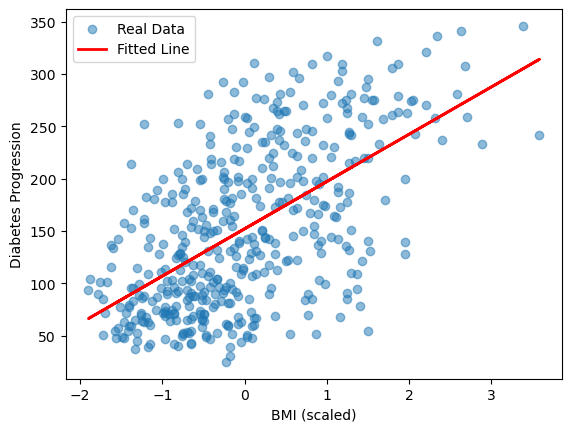

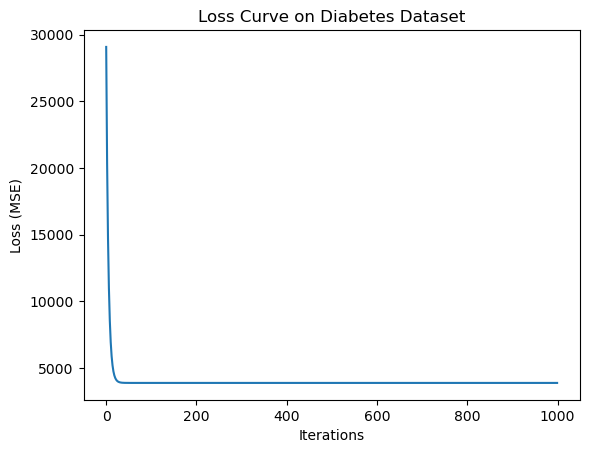

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()
X = diabetes.data[:, [2]]
y = diabetes.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
m, c = 0.0, 0.0
learning_rate = 0.05
iterations = 1000
loss_history = []

for i in range(iterations):
    y_pred = m * X_scaled.flatten() + c
    error = y_pred - y

    loss = np.mean(error ** 2)
    loss_history.append(loss)
    dm = (2 / len(X_scaled)) * np.dot(error, X_scaled.flatten())
    dc = (2 / len(X_scaled)) * np.sum(error)
    m -= learning_rate * dm
    c -= learning_rate * dc

    if i % 100 == 0:
        print(f"Iteration {i}: Loss={loss:.4f}, m={m:.4f}, c={c:.4f}")

print("\nFinal parameters:")
print(f"Slope (m): {m:.4f}, Intercept (c): {c:.4f}")

plt.scatter(X_scaled, y, alpha=0.5, label="Real Data")
plt.plot(X_scaled, m * X_scaled.flatten() + c,
         color='red', linewidth=2, label="Fitted Line")
plt.xlabel("BMI (scaled)")
plt.ylabel("Diabetes Progression")
plt.legend()
plt.show()

plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve on Diabetes Dataset")
plt.show()